In [30]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
conn = sqlite3.connect("chinook/chinook.db")
df = pd.read_sql_query( """
                        select c.customerid as id, c.lastname as name, i.total as total from invoices i
                        inner join customers c on c.customerid = i.customerid
                        where c.country = 'USA'
                        order by total desc
                        """
                       , conn)
df.head()

id        name  total
0  26  Cunningham  23.86
1  25     Stevens  18.86
2  24     Ralston  15.86
3  16      Harris  13.86
4  17       Smith  13.86

In [32]:
df.id.value_counts()

28    7
27    7
26    7
25    7
24    7
23    7
22    7
21    7
20    7
19    7
18    7
17    7
16    7
Name: id, dtype: int64

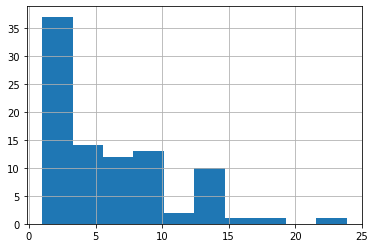

In [34]:
# most charges are less than $10
df.total.hist();

In [40]:
# avg money chase spent
df[df.name == 'Chase'].total.mean()

5.374285714285714

In [49]:
sql = """
select t.name as name, t.Milliseconds as ms, g.name as genre
from tracks as t
inner join genres g on t.GenreId = g.GenreId
where g.name in ('Rock', 'Metal')
order by t.Milliseconds desc
"""

In [50]:
df1 = pd.read_sql_query(sql, conn)
df1.head()

name       ms genre
0               Dazed And Confused  1612329  Rock
1                   Space Truckin'  1196094  Rock
2               Dazed And Confused  1116734  Rock
3  We've Got To Get Together/Jingo  1070027  Rock
4                      Funky Piano   934791  Rock

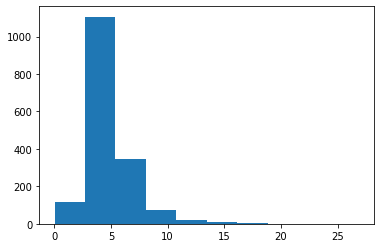

In [54]:
minutes = (df1.ms / 1000) / 60
plt.hist(minutes);

In [55]:
df1['minutes'] = minutes
df1.head()

name       ms genre    minutes
0               Dazed And Confused  1612329  Rock  26.872150
1                   Space Truckin'  1196094  Rock  19.934900
2               Dazed And Confused  1116734  Rock  18.612233
3  We've Got To Get Together/Jingo  1070027  Rock  17.833783
4                      Funky Piano   934791  Rock  15.579850

In [64]:
# over 4 days of rock and only 1 day of metal
df1.groupby(['genre']).sum()['minutes'].sort_values(ascending=False) / (60 * 24)

genre
Rock     4.261937
Metal    1.340814
Name: minutes, dtype: float64